Running on Google Colab with GPU

In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.PETS)/'images'

In [3]:
def is_cat(x):
  return x[0].isupper()

In [4]:
print(path)

/root/.fastai/data/oxford-iiit-pet/images


In [5]:
dls = ImageDataLoaders.from_name_func(path, get_image_files(path),valid_pct = 0.2, seed = 42, label_func = is_cat,item_tfms=Resize(224))

In [6]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [7]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.179728,0.028716,0.007442,00:55


epoch,train_loss,valid_loss,error_rate,time
0,0.056944,0.018610,0.008796,00:51


Note that above fine tune takes a while

In [10]:
# Add this to handle widgets error
import ipywidgets as widgets

uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

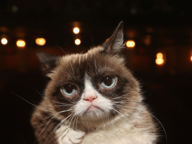

In [12]:
# Now, predict an image!
img = PILImage.create(uploader.data[0])
img.to_thumb(192)

In [13]:
is_cat, _, probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}")
print(f"Probability of it being a cat: {probs[1].item():.6f}")

Is this a cat?: True
Probability of it being a cat: 1.000000


In [14]:
# try wolf
uploader

FileUpload(value={'grumpycat.jpg': {'metadata': {'name': 'grumpycat.jpg', 'type': 'image/jpeg', 'size': 118076…

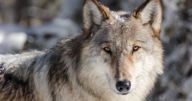

In [16]:
# Now, predict an image - wolf this time!
img = PILImage.create(uploader.data[0])
img.to_thumb(192)

In [17]:
is_cat, _, probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}")
print(f"Probability of it being a cat: {probs[1].item():.6f}")

Is this a cat?: False
Probability of it being a cat: 0.000003


In [18]:
# Now, let's look at lynx - which looks similar to a cat, but is not a cat
uploader

FileUpload(value={'wolf.jpg': {'metadata': {'name': 'wolf.jpg', 'type': 'image/jpeg', 'size': 541454, 'lastMod…

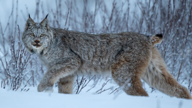

In [19]:
# lynx this time!
img = PILImage.create(uploader.data[0])
img.to_thumb(192)

In [20]:
is_cat, _, probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}")
print(f"Probability of it being a cat: {probs[1].item():.6f}")

Is this a cat?: True
Probability of it being a cat: 0.995906


# So, the model failed to differentiate between a cat and a lynx, while it could separate a cat and a wolf
# However, I believe that this may be somewhat expected given that this example was more for a cat vs a dog

In [23]:
# Just for testing, let's see if the percentage drops if we use a ResNet152

learn152 = cnn_learner(dls, resnet152, metrics=error_rate)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://downlo

  0%|          | 0.00/230M [00:00<?, ?B/s]

In [24]:
learn152.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.071522,0.014712,0.004736,01:53


epoch,train_loss,valid_loss,error_rate,time
0,0.058479,0.008835,0.003383,02:33


In [25]:
is_cat, _, probs = learn152.predict(img)
print(f"Is this a cat?: {is_cat}")
print(f"Probability of it being a cat: {probs[1].item():.6f}")

Is this a cat?: True
Probability of it being a cat: 0.999888


Looks like no difference! In fact, slightly worse!

# Now, let's try segmentation task

In [26]:
path = untar_data(URLs.CAMVID_TINY)

In [27]:
dls = SegmentationDataLoaders.from_label_func(path, bs=8, fnames = get_image_files(path/"images"),label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
                                              codes = np.loadtxt(path/'codes.txt',dtype=str))

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1121: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


In [28]:
learn = unet_learner(dls,resnet34)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1121: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The cur

In [29]:
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,4.018318,2.414069,00:01


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1121: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


epoch,train_loss,valid_loss,time
0,2.000835,1.685255,00:01
1,1.680621,1.169192,00:01
2,1.575300,1.176157,00:01
3,1.410439,0.939461,00:01
4,1.253923,0.823842,00:01
5,1.124608,0.770740,00:01
6,1.018657,0.751323,00:01
7,0.937483,0.751883,00:01


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1121: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


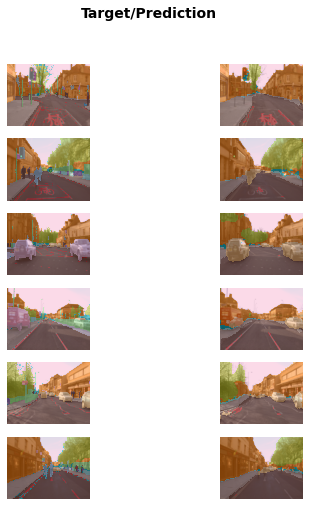

In [30]:
learn.show_results(max_n=6, figsize=(7,8))

# Now, a NLP use case

In [31]:
from fastai.text.all import *

In [32]:
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB),valid='test')

In [33]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

In [34]:
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.467439,0.392592,0.825200,03:29


epoch,train_loss,valid_loss,accuracy,time
0,0.311035,0.349952,0.850480,07:18
1,0.242869,0.214998,0.913320,07:13
2,0.192735,0.187433,0.928120,07:12
3,0.145593,0.192436,0.929440,07:11


In [35]:
# Let's try with a rotten tomato comment on Morbius (a.k.a. movie that everyone has said is terrible!)
learn.predict('''There are no interesting characters, no clearly defined rules or powers, no exciting action setpieces, no eye-widening visual spectacle, 
and none of the sense of danger, addiction, or damnation you might assume would give something like this a spark.''')

('neg', tensor(0), tensor([0.9078, 0.0922]))

In [38]:
# Another example - but from Titanic (so a lot more positive!)
learn.predict('''Now, let me tell you what's really impressive about Cameron's film. In the midst of all of the hydraulic set spasms, dauntless stuntwork and computerized mirages, 
Titanic cultivates one of the best mainstream love stories Hollywood has produced in years.''')

('pos', tensor(1), tensor([0.0010, 0.9990]))

# Onto the tabular data-based example

In [36]:
from fastai.tabular.all import *

In [37]:
path = untar_data(URLs.ADULT_SAMPLE)

In [40]:
dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
                                  cat_names = ['workclass','education','marital-status','occupation','relationship','race'],
                                  cont_names = ['age', 'fnlwgt','education-num'],
                                  procs = [Categorify, FillMissing, Normalize])

In [41]:
learn = tabular_learner(dls, metrics=accuracy)

In [42]:
# below is actual fitting, instead of transfer learning as seen above
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.390689,0.366031,0.830620,00:04
1,0.358939,0.356478,0.836302,00:04
2,0.347667,0.346216,0.839681,00:04


# Collaborative filtering use case

In [43]:
from fastai.collab import *

In [44]:
path = untar_data(URLs.ML_SAMPLE)

In [45]:
dls = CollabDataLoaders.from_csv(path/'ratings.csv')

In [48]:
learn = collab_learner(dls, y_range=(0.5,5.5))

In [49]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.521805,1.373361,00:00


epoch,train_loss,valid_loss,time
0,1.402594,1.315434,00:00
1,1.299001,1.130964,00:00
2,1.042996,0.809295,00:00
3,0.829083,0.654222,00:00
4,0.714318,0.617528,00:00
5,0.670050,0.606294,00:00
6,0.646040,0.601056,00:00
7,0.634952,0.599133,00:00
8,0.632778,0.598669,00:00
9,0.634434,0.598507,00:00


In [50]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,85.0,67.0,5.0,4.528593
1,67.0,79.0,3.0,3.212842
2,37.0,43.0,3.0,3.670431
3,3.0,66.0,5.0,3.842023
4,2.0,68.0,2.5,3.516283
5,5.0,89.0,5.0,3.854290
6,46.0,4.0,0.5,2.940229
7,32.0,78.0,5.0,3.462304
8,22.0,35.0,4.5,3.535543


# Let's see if we can make better - let's fine tune 300x

In [51]:
learn = collab_learner(dls, y_range=(0.5,5.5))

learn.fine_tune(300)

epoch,train_loss,valid_loss,time
0,1.363029,1.316310,00:01
1,1.348482,1.266096,00:01
2,1.293568,1.209214,00:00
3,1.238097,1.146716,00:00
4,1.173137,1.081512,00:00
5,1.103137,1.014511,00:00
6,1.038464,0.949680,00:00
7,0.979494,0.888972,00:00
8,0.910610,0.832246,00:00
9,0.861279,0.783830,00:00


In [52]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,45.0,68.0,3.5,3.438166
1,74.0,50.0,4.0,4.428262
2,39.0,57.0,4.5,4.311257
3,23.0,14.0,4.0,4.755618
4,83.0,81.0,5.0,4.452203
5,99.0,77.0,4.5,5.093350
6,56.0,59.0,5.0,4.553816
7,53.0,42.0,4.0,3.631289
8,18.0,58.0,4.0,4.221721


# Above results seem to show an improvement but looking at the results from training, it appears to have overfit!

In [ ]:
# Empty space
# Left for additional exercises if needed